In [1]:
from time import time as get_time
from utilities import fun_name, generate_array

from matplotlib import pyplot as plt

from sorts.bubble_sort import bubble_sort
from sorts.shaker_sort import shaker_sort
from sorts.comb_sort import comb_sort
from sorts.insertion_sort import insertion_sort
from sorts.selection_sort import selection_sort
from sorts.merge_sort import merge_sort
from sorts.quick_sort import quick_sort
from sorts.heap_sort import heap_sort

In [2]:
def get_top(results):
    return sorted(list(results.items()), key=lambda r: r[1][-1][-1])

plot_dir = 'plots/'
def plot_top(top, unique_perc, plot_name):
    fig = plt.figure(figsize=(16, 8))
    plt.title('Sorting algorithms speed comparison\n'
              + 'unique_perc = %s' % unique_perc, fontsize=20)
    
    colors = ['r', '#FF4500', 'm', 'b', '#1E90FF', 'g', '#9ACD32', '#999999']
    for i, (sort_fun, rs) in enumerate(top):
        sizes, _, times = zip(*rs)
        plt.plot(sizes, times,
                 linestyle = '-',
                 marker = 'o',
                 color=colors[i % len(colors)],
                 label=sort_fun)

    plt.xlabel('array_size', fontsize=20)
    plt.ylabel('time', fontsize=20)
    plt.grid(True)
    plt.legend(loc=0, fontsize=20)
    
    plt.savefig(plot_dir + plot_name + '.png')

In [16]:
# TODO: calc avg speed over multiple arrays
# TODO: add partially sorted feature
def test_speed(sort_funs, array_sizes, unique_perc):
    print('SPEED TEST')
    print('SORT FUNS: %s' % list(map(fun_name, sort_funs)))
    print('UNIQUE PERCENTAGE: %s' % unique_perc)
     
    results = { fun_name(sort_fun) : [] for sort_fun in sort_funs }
    
    for array_size in array_sizes:
        print('\nARRAY SIZE: %s' % array_size)
        
        unique_count = int(array_size * unique_perc)
        lb = -(unique_count // 2) + (unique_count % 2 == 0)
        rb = unique_count // 2
        print('UNIQUE COUNT: %s' % unique_count)
        
        b = generate_array(array_size, lb, rb)
        for sort_fun in sort_funs:
            print('SORT: %s' % fun_name(sort_fun))
            
            a = b[:]

            start = get_time()
            sort_fun(a)
            end = get_time()

            results[fun_name(sort_fun)].append((array_size, unique_count, end - start))

            print('TIME: %s' % results[fun_name(sort_fun)][-1][-1])
        
        top = sorted([(sort_fun, results[sort_fun][-1][-1]) for sort_fun in results], key=lambda r: r[1])
        print('\nTOP:')
        for r in top:
            print('%s: %s' % r)
    
    print('\nSPEED TEST DONE!')
    return results

In [4]:
sort_funs = [
    quick_sort,
    heap_sort,
    comb_sort,
    
    merge_sort,
    
    selection_sort,
    insertion_sort,
    shaker_sort,
    bubble_sort,
]

array_sizes = [
    int(1e3),
    int(5e3),
    int(1e4),
    int(5e4),
    int(1e5),
    
    int(3e5),
    int(5e5),
    
    int(8e5),
    int(1e6),
]

unique_perc_1 = 1

In [15]:
results_1 = test_speed(sort_funs[:3], array_sizes[:], unique_perc_1)

SPEED TEST
SORT FUNS: ['quick_sort', 'heap_sort', 'comb_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: quick_sort
TIME: 0.00893712043762207
SORT: heap_sort
TIME: 0.019774913787841797
SORT: comb_sort
TIME: 0.012226343154907227

TOP:
quick_sort: 0.00893712043762207
comb_sort: 0.012226343154907227
heap_sort: 0.019774913787841797

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: quick_sort
TIME: 0.019016504287719727
SORT: heap_sort
TIME: 0.03501176834106445
SORT: comb_sort
TIME: 0.029434680938720703

TOP:
quick_sort: 0.019016504287719727
comb_sort: 0.029434680938720703
heap_sort: 0.03501176834106445

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: quick_sort
TIME: 0.03427863121032715
SORT: heap_sort
TIME: 0.08530354499816895
SORT: comb_sort
TIME: 0.07375574111938477

TOP:
quick_sort: 0.03427863121032715
comb_sort: 0.07375574111938477
heap_sort: 0.08530354499816895

ARRAY SIZE: 50000
UNIQUE COUNT: 50000
SORT: quick_sort
TIME: 0.20271515846252441
SORT: heap_sort
TIME: 0.50499129

In [6]:
results_2 = test_speed([sort_funs[3]], array_sizes[:], unique_perc_1)

SPEED TEST
SORT FUNS: ['merge_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: merge_sort
TIME: 0.008023262023925781

TOP:
merge_sort: 0.008023262023925781

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: merge_sort
TIME: 0.06362438201904297

TOP:
merge_sort: 0.06362438201904297

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: merge_sort
TIME: 0.10924148559570312

TOP:
merge_sort: 0.10924148559570312

ARRAY SIZE: 50000
UNIQUE COUNT: 50000
SORT: merge_sort
TIME: 1.0986320972442627

TOP:
merge_sort: 1.0986320972442627

ARRAY SIZE: 100000
UNIQUE COUNT: 100000
SORT: merge_sort
TIME: 3.820317268371582

TOP:
merge_sort: 3.820317268371582

ARRAY SIZE: 300000
UNIQUE COUNT: 300000
SORT: merge_sort
TIME: 36.342291831970215

TOP:
merge_sort: 36.342291831970215

ARRAY SIZE: 500000
UNIQUE COUNT: 500000
SORT: merge_sort
TIME: 92.74882745742798

TOP:
merge_sort: 92.74882745742798

ARRAY SIZE: 800000
UNIQUE COUNT: 800000
SORT: merge_sort
TIME: 322.4615008831024

TOP:
merge_sort: 322.461500

In [7]:
results_3 = test_speed(sort_funs[4:], array_sizes[:5], unique_perc_1)

SPEED TEST
SORT FUNS: ['selection_sort', 'insertion_sort', 'shaker_sort', 'bubble_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: selection_sort
TIME: 0.0582737922668457
SORT: insertion_sort
TIME: 0.12393021583557129
SORT: shaker_sort
TIME: 0.10899496078491211
SORT: bubble_sort
TIME: 0.12110757827758789

TOP:
selection_sort: 0.0582737922668457
shaker_sort: 0.10899496078491211
bubble_sort: 0.12110757827758789
insertion_sort: 0.12393021583557129

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: selection_sort
TIME: 1.401820421218872
SORT: insertion_sort
TIME: 2.0222058296203613
SORT: shaker_sort
TIME: 2.4913265705108643
SORT: bubble_sort
TIME: 3.132568359375

TOP:
selection_sort: 1.401820421218872
insertion_sort: 2.0222058296203613
shaker_sort: 2.4913265705108643
bubble_sort: 3.132568359375

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: selection_sort
TIME: 5.677451848983765
SORT: insertion_sort
TIME: 8.387787580490112
SORT: shaker_sort
TIME: 10.912084341049194
SORT: bubble

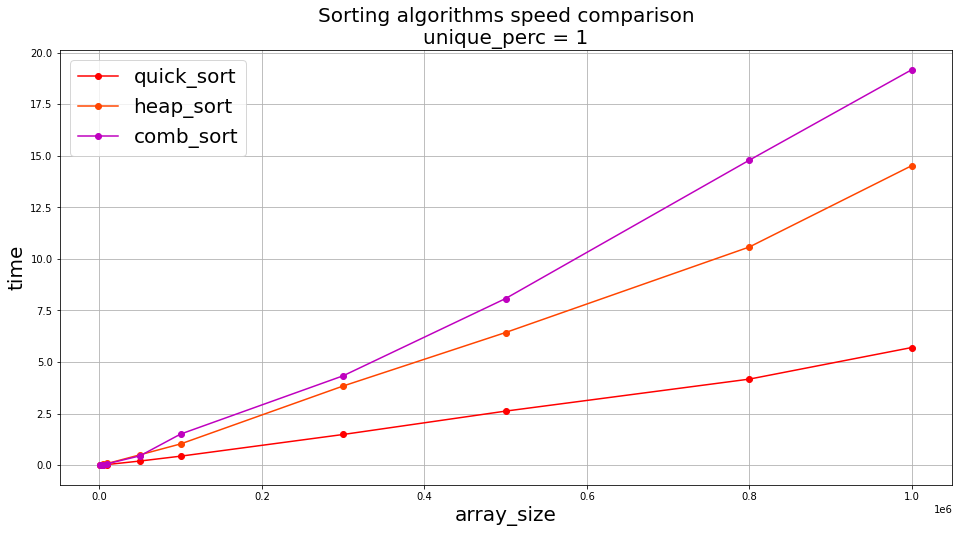

In [22]:
top_1 = get_top(results_1)
plot_top(top_1, unique_perc_1, 'top_1')

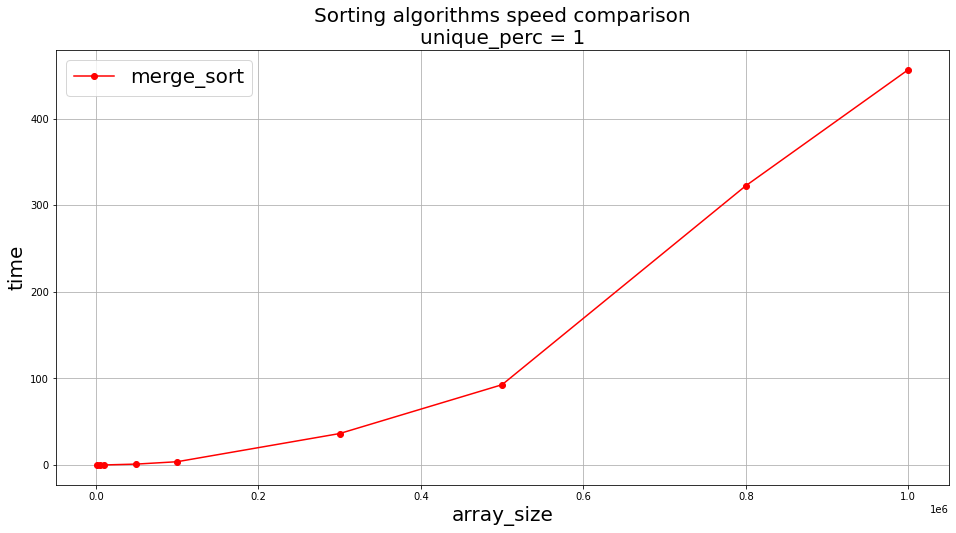

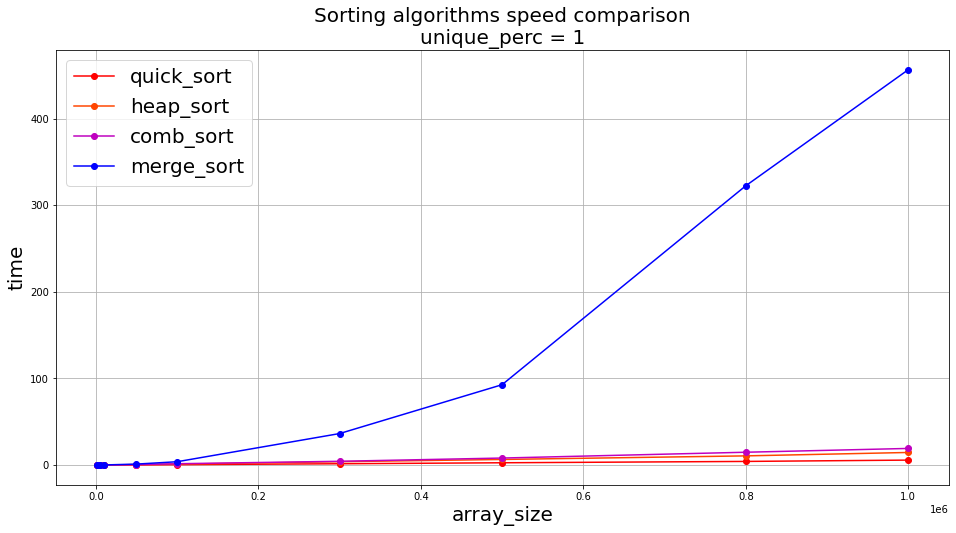

In [23]:
top_2 = get_top(results_2)
plot_top(top_2, unique_perc_1, 'top_2')
plot_top(top_1 + top_2, unique_perc_1, 'top_1_top_2')

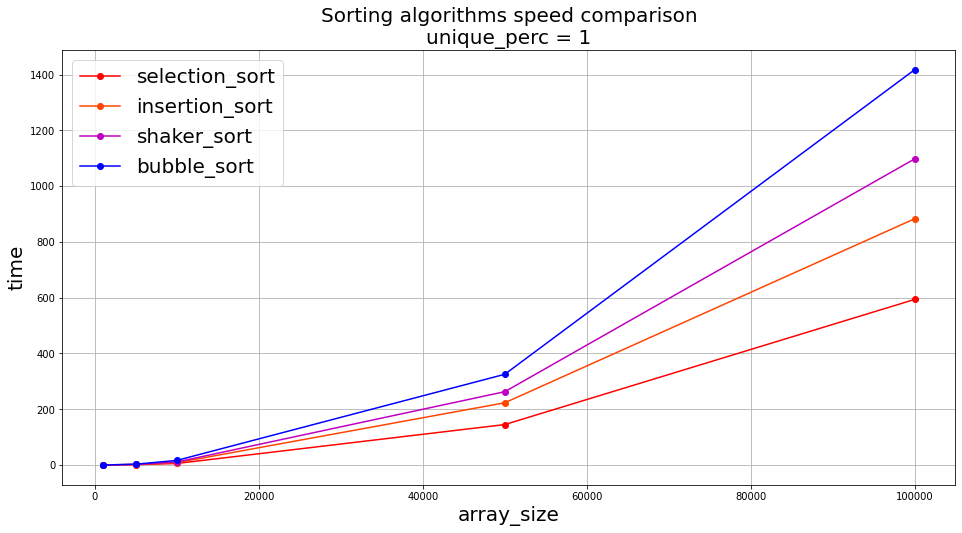

In [24]:
top_3 = get_top(results_3)
plot_top(top_3, unique_perc_1, 'top_3')

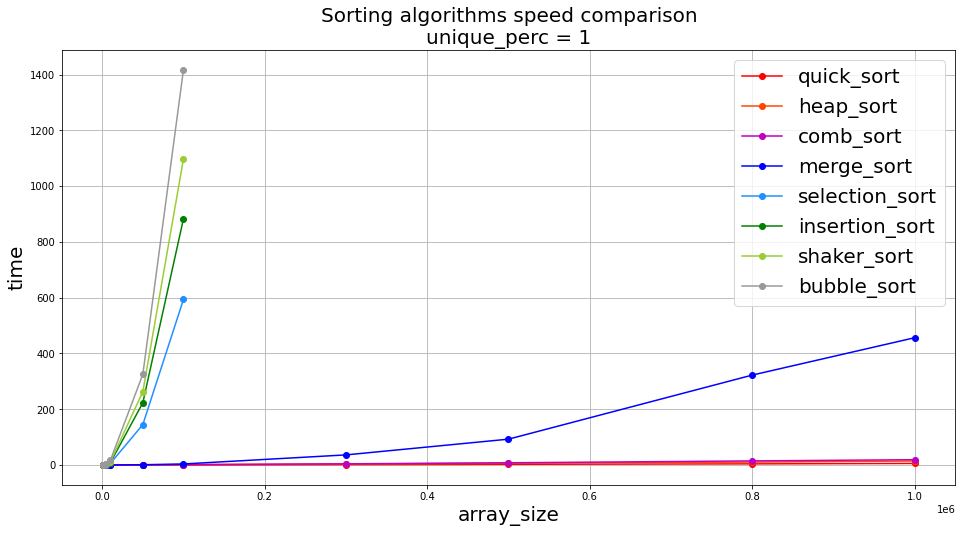

In [25]:
plot_top(top_1 + top_2 + top_3, unique_perc_1, 'top_1_top_2_top_3')

In [12]:
unique_perc_2 = 0.001
results_1_2 = test_speed(sort_funs[:3], array_sizes[:], unique_perc_2)

SPEED TEST
SORT FUNS: ['quick_sort', 'heap_sort', 'comb_sort']
UNIQUE PERCENTAGE: 0.001

ARRAY SIZE: 1000
UNIQUE COUNT: 1
SORT: quick_sort
TIME: 0.0044727325439453125
SORT: heap_sort
TIME: 0.0009982585906982422
SORT: comb_sort
TIME: 0.0027806758880615234

TOP:
heap_sort: 0.0009982585906982422
comb_sort: 0.0027806758880615234
quick_sort: 0.0044727325439453125

ARRAY SIZE: 5000
UNIQUE COUNT: 5
SORT: quick_sort
TIME: 0.016750335693359375
SORT: heap_sort
TIME: 0.02822589874267578
SORT: comb_sort
TIME: 0.029063940048217773

TOP:
quick_sort: 0.016750335693359375
heap_sort: 0.02822589874267578
comb_sort: 0.029063940048217773

ARRAY SIZE: 10000
UNIQUE COUNT: 10
SORT: quick_sort
TIME: 0.03529477119445801
SORT: heap_sort
TIME: 0.06984639167785645
SORT: comb_sort
TIME: 0.05308341979980469

TOP:
quick_sort: 0.03529477119445801
comb_sort: 0.05308341979980469
heap_sort: 0.06984639167785645

ARRAY SIZE: 50000
UNIQUE COUNT: 50
SORT: quick_sort
TIME: 0.1955244541168213
SORT: heap_sort
TIME: 0.440089941

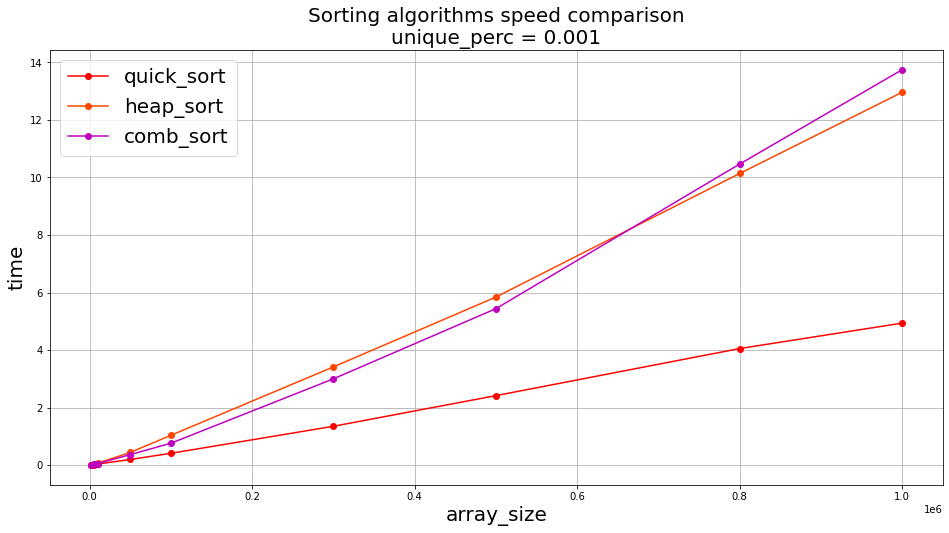

In [26]:
top_1_2 = get_top(results_1_2)
plot_top(top_1_2, unique_perc_2, 'top_1_2')

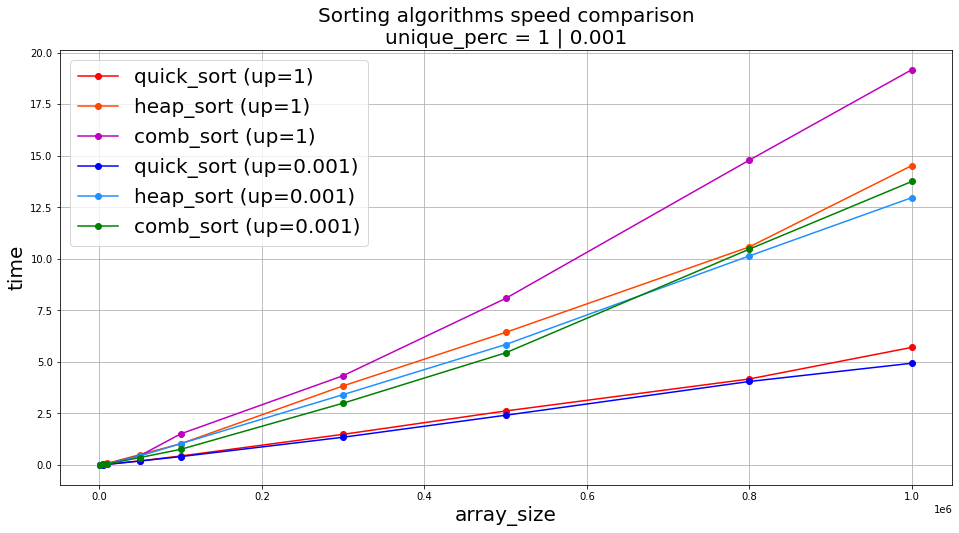

In [27]:
plot_top(list(map(lambda t: (t[0] + ' (up=%s)' % unique_perc_1, t[1]), top_1))
         + list(map(lambda t: (t[0] + ' (up=%s)' % unique_perc_2, t[1]), top_1_2)),
         '%s | %s' % (unique_perc_1, unique_perc_2),
         'up_comp')